In [1]:
import numpy as np
from vae.arch import VAE
import matplotlib.pyplot as plt
batch_num = 0

/Users/davidfoster/.virtualenvs/worldmodels/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
vae = VAE()
vae.set_weights('./vae/weights.h5')

In [3]:
obs_data = np.load('./data/obs_data_car_racing_' + str(batch_num) + '.npy') 
action_data = np.load('./data/action_data_car_racing_' + str(batch_num) + '.npy')
reward_data = np.load('./data/reward_data_car_racing_' + str(batch_num) + '.npy') 
done_data = np.load('./data/done_data_car_racing_' + str(batch_num) + '.npy')
rnn_input = np.load('./data/rnn_input_' + str(batch_num) + '.npy') 
rnn_output = np.load('./data/rnn_output_' + str(batch_num) + '.npy')

In [4]:
rnn_input[0].shape

(299, 35)

In [5]:
rnn_output[0].shape

(299, 34)

[ 0.4150559   0.91052317 -1.04474245  0.30461107 -0.67085082  0.67729807
  1.6245269  -0.79195908  1.55952039 -0.84370605 -1.59933086 -0.75250287
 -1.30592514 -1.20829211 -0.13562487 -0.93270947 -0.50538584 -0.21083795
  0.27757531 -1.00108614 -0.08338227  0.49316036 -0.94118018  0.10695162
 -0.4353165  -1.52131684  0.04935725 -1.6026138  -1.22860554 -0.01676993
  0.57974506  1.3946451   0.          1.          0.        ]


<function matplotlib.pyplot.show>

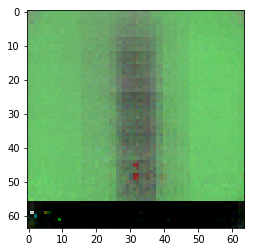

In [6]:
idx = 50
obs = rnn_input[0][idx]
print(obs)
z_decoded = vae.decoder.predict(np.array([obs[:32]]))[0]
plt.imshow(z_decoded)
plt.show